# Проект: классификация

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [3]:
df = pd.read_csv('data/bank_fin.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


### Задание 2

In [5]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

### Задание 3

In [6]:
df['balance'] = df['balance'].str.replace(',', '.')
df['balance'] = df['balance'].str.replace('$', '')
df['balance'] = df['balance'].str.replace(' ', '')

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.00,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.00,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.00,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.00,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.00,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [8]:
df['balance'] = df['balance'].astype(float)

In [9]:
df['balance'].mean().round(3)

1529.129

### Задание 4

In [10]:
from statistics import median
df['balance'] = df['balance'].fillna(df['balance'].median())

In [11]:
df['balance'].mean().round(3)

1526.936

### Задание 5

In [12]:
df['job'].mode()

0    management
Name: job, dtype: object

In [13]:
df['job'] = df['job'].str.replace('unknown', 'management')

In [14]:
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [15]:
df['education'].mode()

0    secondary
Name: education, dtype: object

In [16]:
df['education'] = df['education'].str.replace('unknown', 'secondary')

In [17]:
df[(df['job'] == 'management') & (df['education'] == 'secondary')]['balance'].mean().round(3)

1598.883

### Задание 6

In [18]:
q_1 = df['balance'].quantile(0.25)
q_3 = df['balance'].quantile(0.75)

iqr = q_3 - q_1

lower_bound = q_1 - 1.5*iqr
upper_bound = q_3 + 1.5*iqr

df_cleaned = df[(df['balance'] >= lower_bound)&(df['balance'] <= upper_bound)].reset_index()

fig = px.histogram(
    df_cleaned,
    x = 'balance',
    title = '"Распределение баланса счета; $"',
    histnorm = 'percent',
    width = 900,
    marginal='box',
)
fig.update_layout(title = dict(x = .5, xanchor = "center"),
                  xaxis_title = "Баланс счета; $",
                  yaxis_title="Доля клиентов банка; %",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

print(df_cleaned['balance'].describe())

count    10105.000000
mean       807.653538
std        994.151966
min      -2049.000000
25%         95.000000
50%        445.000000
75%       1227.000000
max       4063.000000
Name: balance, dtype: float64


In [19]:
print('25-й перцентиль: {},'.format(q_1),
      '75-й перцентиль: {},'.format(q_3),
      "IQR: {}, ".format(iqr),
      "Границы выбросов: [{lb}, {ub}].".format(lb=lower_bound, ub=upper_bound))

25-й перцентиль: 123.0, 75-й перцентиль: 1699.0, IQR: 1576.0,  Границы выбросов: [-2241.0, 4063.0].


In [20]:
print(f'Результирующее число записей: {df_cleaned.shape[0]}')

Результирующее число записей: 10105


In [21]:
df = df_cleaned

## Часть 2:  Разведывательный анализ

### Задание 1

In [22]:
df['deposit'].value_counts()

no     5424
yes    4681
Name: deposit, dtype: int64

<AxesSubplot:xlabel='deposit', ylabel='count'>

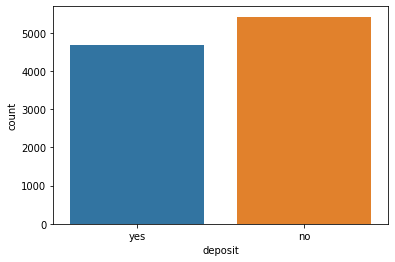

In [23]:
sns.countplot(data=df, x='deposit')

### Задания 2 и 3

In [24]:
df.describe()

,index,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,5627.074715,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,3223.261961,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,0.000000,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,2852.000000,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,5684.000000,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,8413.000000,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,11161.000000,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


### Задания 4 и 5

In [25]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


<AxesSubplot:xlabel='month', ylabel='count'>

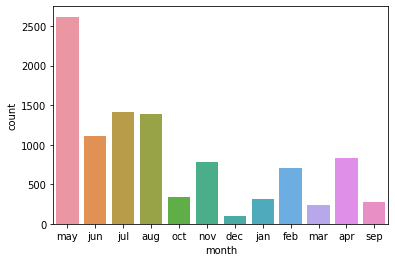

In [26]:
sns.countplot(data=df, x='month')

<AxesSubplot:xlabel='job', ylabel='count'>

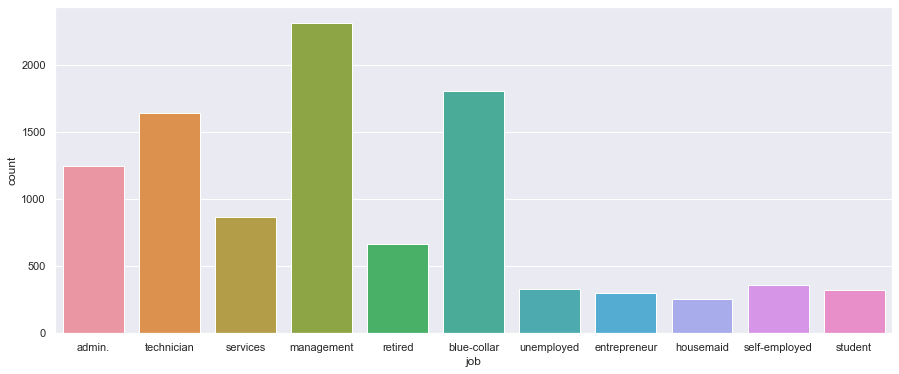

In [27]:
sns.set(rc={'figure.figsize':(15,6)})

sns.countplot(data=df, x='job')

### Задание 6

In [28]:
df['poutcome'].value_counts()

unknown    7570
failure    1109
success     945
other       481
Name: poutcome, dtype: int64

### Задание 7

In [29]:
temp = df.groupby(['month'])['deposit'].value_counts(normalize=True,
                                                       sort=False)
temp = pd.DataFrame(temp)
temp.columns = ['deposit_count']
temp.reset_index(level='deposit', inplace=True)
temp[temp['deposit'] == 'no']['deposit_count'].sort_values().index[-1]

'may'

### Задание 8

In [30]:
bins= [0,30,40,50,60,9999]
labels = ['<30','30-40','40-50','50-60','>60']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [31]:
temp = df.groupby(['AgeGroup'])['deposit'].value_counts(normalize=True,
                                                       sort=False)
display(temp)

AgeGroup  deposit
<30       no         0.408247
          yes        0.591753
30-40     no         0.566776
          yes        0.433224
40-50     no         0.606213
          yes        0.393787
50-60     no         0.594921
          yes        0.405079
>60       no         0.240429
          yes        0.759571
Name: deposit, dtype: float64

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

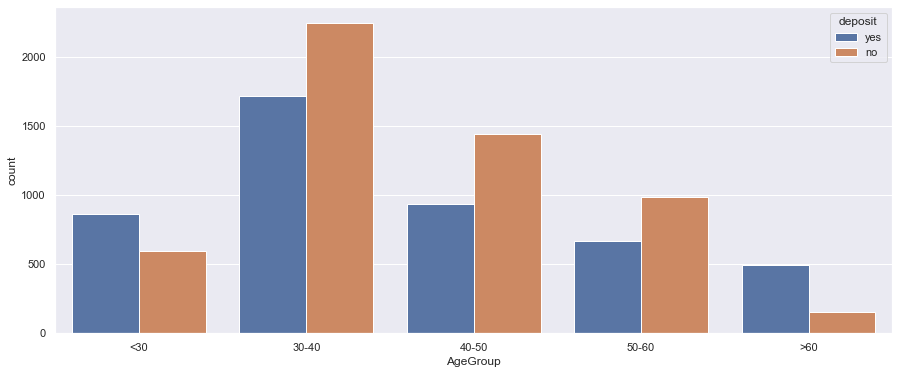

In [32]:
sns.countplot(data=df, hue='deposit', x='AgeGroup')


### Задания 9 и 10

<AxesSubplot:xlabel='marital', ylabel='count'>

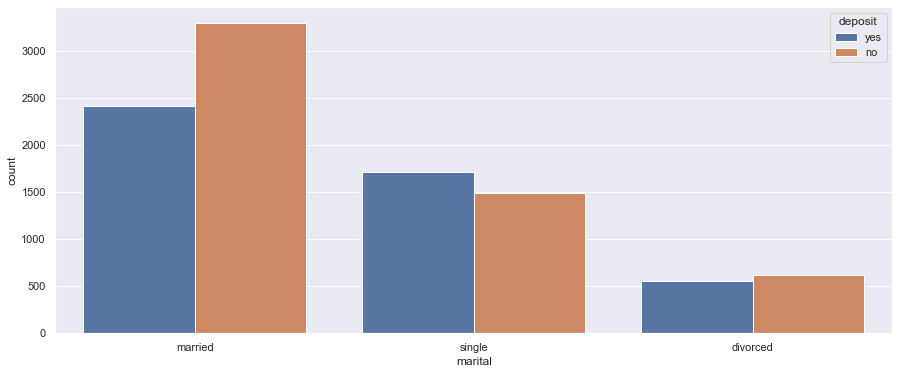

In [33]:
sns.countplot(data=df, hue='deposit', x='marital')

<AxesSubplot:xlabel='education', ylabel='count'>

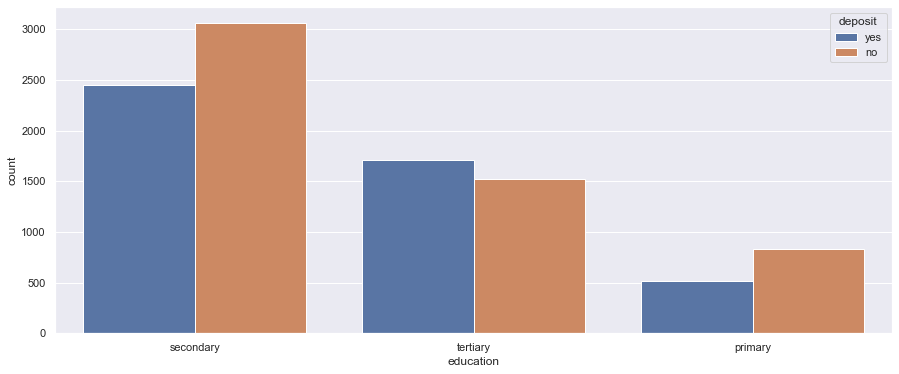

In [34]:
sns.countplot(data=df, hue='deposit', x='education')

<AxesSubplot:xlabel='job', ylabel='count'>

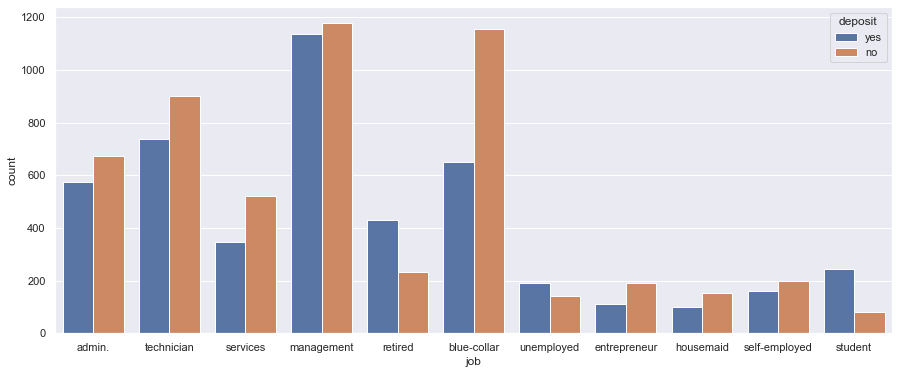

In [35]:
sns.countplot(data=df, hue='deposit', x='job')

### Задание 11

In [36]:
df_yes = df[df['deposit'] == 'yes'][['education', 'marital']]
df_no = df[df['deposit'] == 'no'][['education', 'marital']]

In [37]:
temp_yes = df_yes.groupby(['education', 'marital']).value_counts()
display(temp_yes)

education  marital 
primary    divorced      96
           married      339
           single        82
secondary  divorced     283
           married     1289
           single       879
tertiary   divorced     174
           married      784
           single       755
dtype: int64

In [38]:
temp_yes = temp_yes.reset_index().pivot(index='education', columns='marital', values=0)

<AxesSubplot:xlabel='marital', ylabel='education'>

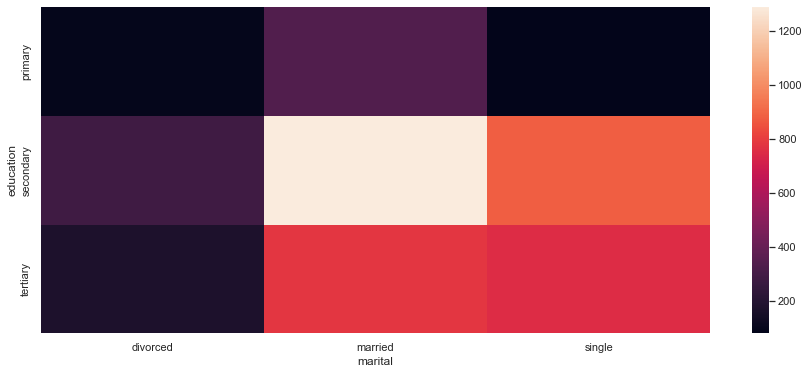

In [39]:
sns.heatmap(temp_yes)

In [40]:
temp_no = df_no.groupby(['education', 'marital']).value_counts()
display(temp_no)

education  marital 
primary    divorced      91
           married      641
           single       100
secondary  divorced     370
           married     1830
           single       866
tertiary   divorced     163
           married      832
           single       531
dtype: int64

In [41]:
temp_no = temp_no.reset_index().pivot(index='education', columns='marital', values=0)

<AxesSubplot:xlabel='marital', ylabel='education'>

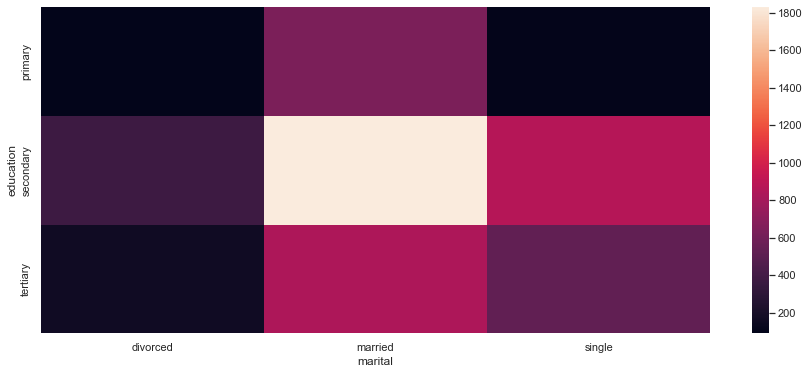

In [42]:
sns.heatmap(temp_no)

## Часть 3: преобразование данных

### Задание 1

In [43]:
le = preprocessing.LabelEncoder()
df['education'] = le.fit_transform(df['education'])

In [44]:
df['education'].sum()

11995

In [45]:
df['AgeGroup'] = le.fit_transform(df['AgeGroup'])

### Задания 2 и 3

In [46]:
lb = preprocessing.LabelBinarizer()
df['deposit'] = lb.fit_transform(df['deposit'])

In [47]:
round(df['deposit'].std(),3)

0.499

In [48]:
df['default'] = lb.fit_transform(df['default'])

In [49]:
df['housing'] = lb.fit_transform(df['housing'])

In [50]:
df['loan'] = lb.fit_transform(df['loan'])

In [51]:
s = df['default'].mean() + df['housing'].mean() + df['loan'].mean()
round(s, 3)

0.635

In [52]:
df.head()

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,AgeGroup
0,0,59,admin.,married,1,0,2343.0,1,0,unknown,5,may,1042,1,-1,0,unknown,1,2
1,1,56,admin.,married,1,0,45.0,0,0,unknown,5,may,1467,1,-1,0,unknown,1,2
2,2,41,technician,married,1,0,1270.0,1,0,unknown,5,may,1389,1,-1,0,unknown,1,1
3,3,55,services,married,1,0,2476.0,1,0,unknown,5,may,579,1,-1,0,unknown,1,2
4,4,54,admin.,married,2,0,184.0,0,0,unknown,5,may,673,2,-1,0,unknown,1,2


### Задание 4

In [53]:
df = pd.get_dummies(data=df)
df = df.drop('index', axis=1)
df.shape

(10105, 46)

### Задания 5 и 6

<AxesSubplot:>

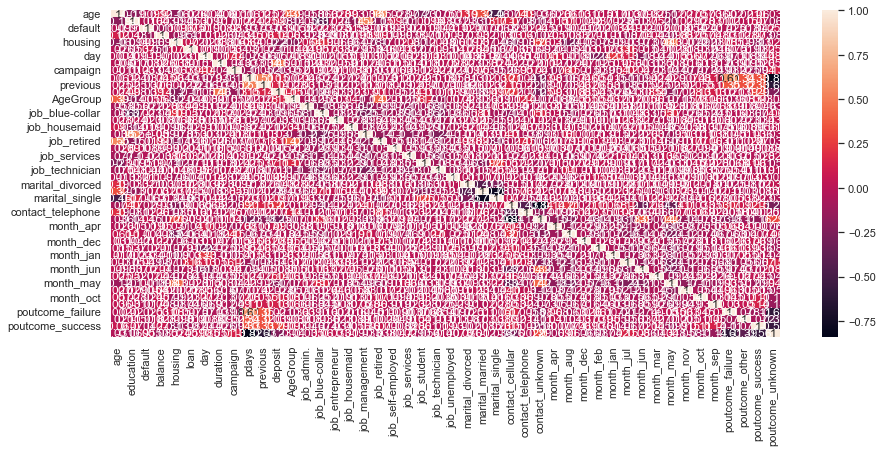

In [54]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)

### Задания 7 и 8

In [55]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [56]:
X_test.shape

(3335, 45)

In [57]:
round(y_test.mean(), 2)

0.46

### Задание 9

In [58]:
from sklearn.feature_selection import SelectKBest, f_classif

skb = SelectKBest(score_func=f_classif, k=15)
skb.fit(X_train, y_train)
skb.get_feature_names_out()

array(['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'AgeGroup', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [59]:
df = df[['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'AgeGroup', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown', 'deposit']]

X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [60]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

print(round(X_test.iloc[:, 0].mean(), 2))  # для признака balance

0.47


### Задание 10

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [61]:
log_reg = linear_model.LogisticRegression(solver= 'sag',max_iter= 1000, random_state= 42)
log_reg.fit(X_train, y_train)
y_train_pred = log_reg.predict(X_train)
print('Train Accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
y_test_pred = log_reg.predict(X_test)
print('Test Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Train Accuracy: 0.82
Test Accuracy: 0.80


### Задания 2,3,4

In [62]:
dt = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=6)

dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
print('Train Accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
y_test_pred = dt.predict(X_test)
print('Test Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Train Accuracy: 0.82
Test Accuracy: 0.81


### Задание 5

In [63]:
from sklearn.model_selection import GridSearchCV
parameters =  {'min_samples_split': [2, 5, 7, 10], 'max_depth':[3,5,7]}
model_cv = GridSearchCV(tree.DecisionTreeClassifier(), parameters,
 cv=3, scoring=('accuracy'), return_train_score=True)
model_cv.fit(X_train, y_train)
print("accuracy на тестовом наборе: {:.2f}".format(model_cv.score(X_test, y_test)))
y_test_pred = model_cv.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(model_cv.best_params_))

accuracy на тестовом наборе: 0.82
f1_score на тестовом наборе: 0.80
Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 2}


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [64]:
#Создаём объект класса RandomForestClassifier
rf_clf = ensemble.RandomForestClassifier(
    n_estimators=100, # число деревьев
    criterion='gini', # критерий эффективности
    max_depth=10, # максимальная глубина дерева
    min_samples_leaf = 5,
    random_state=42 #генератор случайных чисел
)
# Обучаем модель 
rf_clf.fit(X_train, y_train)
y_train_pred = rf_clf.predict(X_train)
print('Train: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
y_test_pred = rf_clf.predict(X_test)
print('Test accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Train: {:.2f}'.format(metrics.recall_score(y_train, y_train_pred)))
print('Test recall: {:.2f}'.format(metrics.recall_score(y_test, y_test_pred)))                           

Train: 0.86
Test accuracy: 0.83
Train: 0.86
Test recall: 0.83


### Задания 2 и 3

In [65]:
gbc_clf = ensemble.GradientBoostingClassifier(
learning_rate = 0.05,
n_estimators = 300,
min_samples_leaf = 5,
max_depth = 5,
random_state = 42
)
# Обучаем модель 
gbc_clf.fit(X_train, y_train)
y_train_pred = gbc_clf.predict(X_train)
y_test_pred = gbc_clf.predict(X_test)
print('Test f1: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Test f1: 0.82


### Задание 4

In [66]:
from sklearn.ensemble import StackingClassifier

#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('log_reg', linear_model.LogisticRegression(solver= 'sag',max_iter= 1000, random_state= 42)),
    ('dt',  tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=6)),
    ('gbc_clf', ensemble.GradientBoostingClassifier(
learning_rate = 0.05,
n_estimators = 300,
min_samples_leaf = 5,
max_depth = 5,
random_state = 42
))
]

#Создаем объект класса стекинг
reg = StackingClassifier(
    estimators=estimators,
    final_estimator=linear_model.LogisticRegression(solver= 'sag',max_iter= 1000, random_state= 42))

#Обучаем модель
reg.fit(X_train, y_train)

StackingClassifier(estimators=[('log_reg',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42,
                                                   solver='sag')),
                               ('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=6,
                                                       random_state=42)),
                               ('gbc_clf',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_depth=5,
                                                           min_samples_leaf=5,
                                                           n_estimators=300,
                                                           random_state=42))],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42,
                                                      solver='sag'))

In [67]:
y_pred_stack = reg.predict(X_test)
print(f'Качество предсказания для стекинга {metrics.classification_report(y_test, y_pred_stack)}')

Качество предсказания для стекинга               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1790
           1       0.81      0.81      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



### Задание 5

<AxesSubplot:>

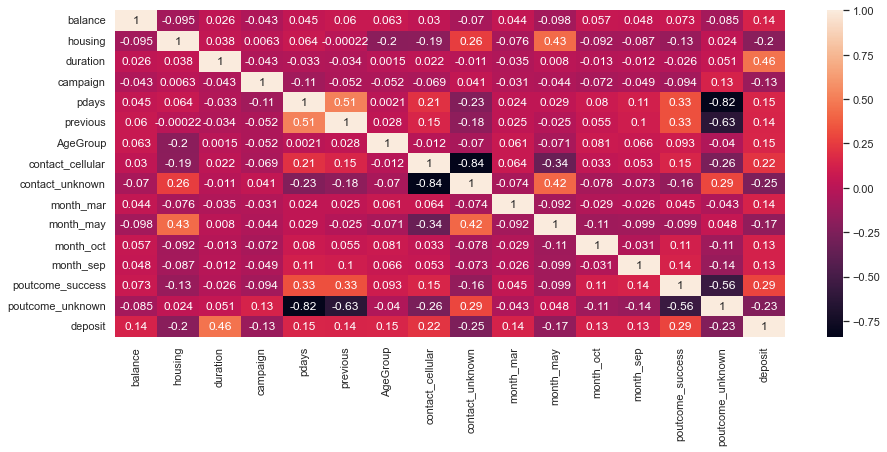

In [68]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)

### Задания 6,7,8

In [69]:
import optuna

def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
    n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
    max_depth = trial.suggest_int('max_depth', 10, 30, 1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
    model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # обучаем модель
    model.fit(X_train, y_train)
    score = metrics.f1_score(y_train, model.predict(X_train))

    return score

In [70]:
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2022-10-11 02:39:54,272] A new study created in memory with name: RandomForestClassifier
[I 2022-10-11 02:39:55,144] Trial 0 finished with value: 0.878414234431091 and parameters: {'n_estimators': 135, 'max_depth': 27, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.878414234431091.
[I 2022-10-11 02:39:55,763] Trial 1 finished with value: 0.8677067082683307 and parameters: {'n_estimators': 107, 'max_depth': 21, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.878414234431091.
[I 2022-10-11 02:39:56,548] Trial 2 finished with value: 0.8513640639698965 and parameters: {'n_estimators': 142, 'max_depth': 30, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.878414234431091.
[I 2022-10-11 02:39:57,266] Trial 3 finished with value: 0.8683963738668334 and parameters: {'n_estimators': 117, 'max_depth': 30, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.878414234431091.
[I 2022-10-11 02:39:58,749] Trial 4 finished with value: 0.9231010671688639 and parameters: {'n_estim

In [71]:
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 191, 'max_depth': 22, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.92


In [72]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.83
f1_score на тестовом наборе: 0.82
